In [2]:
import os
import pygwalker as pyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [3]:
# set column names
# Define column names based on the guide
column_names = [
    "CREDIT SCORE", "FIRST PAYMENT DATE", "FIRST TIME HOMEBUYER FLAG", "MATURITY DATE", "METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION",
    "MORTGAGE INSURANCE PERCENTAGE", "NUMBER OF UNITS", "OCCUPANCY STATUS", "ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)", "ORIGINAL DEBT-TO-INCOME RATIO",
    "ORIGINAL LOAN AMOUNT", "ORIGINAL LOAN-TO-VALUE (LTV)", "ORIGINAL INTEREST RATE", "CHANNEL", "PPM FLAG", "AMORTIZATION TYPE", "PROPERTY STATE",
    "PROPERTY TYPE", "POSTAL CODE", "LOAN SEQUENCE NUMBER", "LOAN PURPOSE", "ORIGINAL LOAN TERM", "NUMBER OF BORROWERS", "SELLER NAME", "SERVICER NAME",
    "SUPER CONFORMING FLAG", "PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER", "PROGRAM INDICATOR", "RELIEF REFINANCE INDICATOR", "PROPERTY VALUATION METHOD",
    "INTEREST ONLY INDICATOR", "MI CANCELLATION INDICATOR"
]

df = pd.read_csv('data/historical_data_1999/historical_data_1999Q1.txt', sep='|', header=None, names= column_names, low_memory=False)
display(df.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,799,199905,N,201404,NaN,0,1,P,48,38,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
1,751,199910,N,202909,NaN,0,1,P,71,20,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
2,733,199909,N,202908,29540.0,0,1,P,51,999,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
3,755,199905,N,202904,29540.0,30,1,P,95,38,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
4,669,200206,N,202901,NaN,0,1,P,80,33,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9


In [ ]:
for folder in os.listdir('data'):
    output_path = os.path.join('data', f'{folder}.csv')
    
    # Check if the CSV file already exists
    if os.path.exists(output_path):
        print(f"CSV file {output_path} already exists. Skipping processing for this folder.")
        continue
    
    # Create an empty DataFrame to store the concatenated data
    df = pd.DataFrame(columns=column_names)
    for Q in ['Q1', 'Q2', 'Q3', 'Q4']:
        try:
            temp_df = pd.read_csv(f'data/{folder}/{folder+Q}.txt', sep='|', header=None, names= column_names, low_memory=False)
            df = pd.concat([df, temp_df], ignore_index=True)
        except Exception as e:                                                                                                                                      
            print(f"Failed to process file {folder}: {e}")
    
    # Write the concatenated DataFrame to a CSV file
    df.to_csv(f'data/{folder}.csv', index=False)

In [17]:
performance_column_names = ['LOAN SEQUENCE NUMBER', 'MONTHLY REPORTING PERIOD', 'CURRENT ACTUAL UPB', 'CURRENT LOAN DELINQUENCY STATUS', 'LOAN AGE', 'REMAINING MONTHS TO LEGAL MATURITY', 
                  'DEFECT SETTLEMENT DATE', 'MODIFICATION FLAG', 'ZERO BALANCE CODE', 'ZERO BALANCE EFFECTIVE DATE', 'CURRENT INTEREST RATE', 'CURRENT NON-INTEREST BEARING UPB', 
                  'DUE DATE OF LAST PAID INSTALLMENT (DDLPI)', 'MI RECOVERIES', 'NET SALES PROCEEDS', 'NON MI RECOVERIES', 'TOTAL EXPENSES', 'LEGAL COSTS', 'MAINTENANCE AND PRESERVATION COSTS',
                  'TAXES AND INSURANCE', 'MISCELLANEOUS EXPENSES', 'ACTUAL LOSS CALCULATION', 'CUMULATIVE MODIFICATION COST', 'STEP MODIFICATION FLAG', 'PAYMENT DEFERRED', 'ESTIMATED LOAN TO VALUE (ELTV)', 
                  'ZERO BALANCE REMOVAL UPB', 'DELINQUENT ACCRUED INTEREST', 'DELINQUENCY DUE TO DISASTER', 'BORROWER ASSISTANCE STATUS CODE', 'CURRENT MONTH MODIFICATION COST', 'INTEREST BEARING UPB']

In [28]:
dtype_dict = {
    'LOAN SEQUENCE NUMBER': 'object',  # Likely alphanumeric
    'MONTHLY REPORTING PERIOD': 'object',  # Consider converting to datetime64 if used as a date
    'CURRENT ACTUAL UPB': 'float32',
    'CURRENT LOAN DELINQUENCY STATUS': 'category',
    'LOAN AGE': 'Int16',  # Changed to nullable integer type
    'REMAINING MONTHS TO LEGAL MATURITY': 'Int16',  # Changed to nullable integer type
    'DEFECT SETTLEMENT DATE': 'object',  # Consider converting to datetime64 if used as a date
    'MODIFICATION FLAG': 'category',
    'ZERO BALANCE CODE': 'category',
    'ZERO BALANCE EFFECTIVE DATE': 'object',  # Consider converting to datetime64 if used as a date
    'CURRENT INTEREST RATE': 'float32',
    'CURRENT NON-INTEREST BEARING UPB': 'float32',
    'DUE DATE OF LAST PAID INSTALLMENT (DDLPI)': 'object',  # Consider converting to datetime64 if used as a date
    'MI RECOVERIES': 'float32',
    'NET SALES PROCEEDS': 'float32',
    'NON MI RECOVERIES': 'float32',
    'TOTAL EXPENSES': 'float32',
    'LEGAL COSTS': 'float32',
    'MAINTENANCE AND PRESERVATION COSTS': 'float32',
    'TAXES AND INSURANCE': 'float32',
    'MISCELLANEOUS EXPENSES': 'float32',
    'ACTUAL LOSS CALCULATION': 'float32',
    'CUMULATIVE MODIFICATION COST': 'float32',
    'STEP MODIFICATION FLAG': 'category',
    'PAYMENT DEFERRED': 'category',
    'ESTIMATED LOAN TO VALUE (ELTV)': 'float32',
    'ZERO BALANCE REMOVAL UPB': 'float32',
    'DELINQUENT ACCRUED INTEREST': 'float32',
    'DELINQUENCY DUE TO DISASTER': 'category',
    'BORROWER ASSISTANCE STATUS CODE': 'category',
    'CURRENT MONTH MODIFICATION COST': 'float32',
    'INTEREST BEARING UPB': 'float32'
}


In [ ]:
for folder in os.listdir('data'):
    
    folderName = folder.split('_')
    
    output_path = f'{folderName[0]}_{folderName[1]}_time_{folderName[2]}'
    output_csv_path = os.path.join('data', f"{output_path}.csv")

    print(output_path)
    
    # Check if the CSV file already exists
    if os.path.exists(output_path):
        print(f"CSV file {output_path} already exists. Skipping processing for this folder.")
        continue
    
    # Create an empty DataFrame to store the concatenated data
    data_frames = []
    
    for Q in ['Q1', 'Q2', 'Q3', 'Q4']:
        file_path = os.path.join('data', folder, f"{output_path}{Q}.txt")
        
        try:
            for chunk in pd.read_csv(file_path, sep='|', header=None, names=performance_column_names, dtype=dtype_dict, chunksize=100000):
                data_frames.append(chunk)
                
        except Exception as e:
            print(f"Failed to process file {folder}: {e}")
    
    # Write the concatenated DataFrame to a CSV file
    if data_frames:
        df = pd.concat(data_frames, ignore_index=True)
        # Write the concatenated DataFrame to a CSV file
        df.to_csv(output_csv_path, index=False)
        print(f"Data successfully written to {output_csv_path}")

In [3]:
chunk_size = 500000  # Define a suitable chunk size based on your system's memory
file_path = 'data/monthly_data/historical_data_time_1999.csv'

# Process the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    display(chunk.head())  # For example, we display the head of each chunk
    break  # Remove or modify this line depending on whether you want to process all chunks or just see the first one


,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,DEFECT SETTLEMENT DATE,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,...,CUMULATIVE MODIFICATION COST,STEP MODIFICATION FLAG,PAYMENT DEFERRED,ESTIMATED LOAN TO VALUE (ELTV),ZERO BALANCE REMOVAL UPB,DELINQUENT ACCRUED INTEREST,DELINQUENCY DUE TO DISASTER,BORROWER ASSISTANCE STATUS CODE,CURRENT MONTH MODIFICATION COST,INTEREST BEARING UPB
0,F99Q10000001,200205,48711.25,0,37,143.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48711.25
1,F99Q10000001,200206,48449.55,0,38,142.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48449.55
2,F99Q10000001,200207,48186.57,0,39,141.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48186.57
3,F99Q10000001,200208,47922.30,0,40,140.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47922.30
4,F99Q10000001,200209,47656.74,0,41,139.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47656.74


In [1]:
import requests
from bs4 import BeautifulSoup

# URLs for each state's ZIP code page
urls = {
    'Texas': 'https://www.zipcodestogo.com/Texas/',
    'California': 'https://www.zipcodestogo.com/California/',
    'Oklahoma': 'https://www.zipcodestogo.com/Oklahoma/',
    'Washington': 'https://www.zipcodestogo.com/Washington/',
    'Florida': 'https://www.zipcodestogo.com/Florida/',
    'Oregon': 'https://www.zipcodestogo.com/Oregon/',
    'New York': 'https://www.zipcodestogo.com/New%20York/',
    'New Mexico': 'https://www.zipcodestogo.com/New%20Mexico/',
    'Arizona': 'https://www.zipcodestogo.com/Arizona/'
}

states_zip_codes = {}

for state, url in urls.items():
    try:
        # Send a request to the webpage
        response = requests.get(url)
        response.raise_for_status()  # Will raise HTTPError for bad responses
        data = response.text

        # Parse the HTML content
        soup = BeautifulSoup(data, 'html.parser')

        # Find all ZIP code links in the page
        zip_codes = [link.text.strip() for link in soup.find_all('a') if link.text.strip().isdigit()]

        # Store the zip codes in the dictionary with the state as the key
        states_zip_codes[state] = zip_codes

    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve ZIP codes for {state}: {e}")

# Print the dictionary of states with their corresponding ZIP codes
print(states_zip_codes)

{'Texas': ['73301', '73344', '75001', '75002', '75006', '75007', '75009', '75010', '75013', '75019', '75020', '75021', '75022', '75023', '75024', '75025', '75028', '75032', '75032', '75033', '75034', '75035', '75036', '75038', '75039', '75040', '75041', '75042', '75043', '75044', '75048', '75050', '75051', '75052', '75054', '75056', '75057', '75058', '75059', '75060', '75061', '75062', '75063', '75064', '75065', '75067', '75068', '75069', '75070', '75071', '75072', '75074', '75075', '75076', '75077', '75078', '75080', '75081', '75082', '75087', '75087', '75088', '75089', '75090', '75090', '75092', '75093', '75094', '75098', '75099', '75102', '75103', '75104', '75105', '75109', '75110', '75114', '75115', '75116', '75117', '75119', '75124', '75125', '75126', '75127', '75134', '75135', '75135', '75137', '75140', '75141', '75142', '75143', '75144', '75146', '75147', '75148', '75149', '75150', '75152', '75153', '75154', '75155', '75156', '75158', '75159', '75160', '75161', '75163', '75165',

In [39]:
for state, zip_codes in states_zip_codes.items():
    # Replace the last two digits with '00' and convert to integers
    standardized_zip_codes = set(int(str(zip_code)[:-2] + '00') for zip_code in zip_codes)

    # Convert the set back to a list (if necessary) and store it back in the dictionary
    states_zip_codes[state] = list(standardized_zip_codes)

# Print the updated dictionary of states with their corresponding ZIP codes
print(states_zip_codes)


{'Texas': [76800, 77700, 75400, 78600, 76300, 79500, 77200, 78100, 79100, 75800, 79000, 76700, 79900, 77600, 75300, 78500, 76200, 79400, 78000, 75700, 78900, 76600, 79800, 77500, 75200, 78400, 76100, 79300, 77000, 77900, 75600, 78800, 73300, 76500, 79700, 77400, 75100, 78300, 76000, 79200, 76900, 78200, 77800, 75500, 78700, 76400, 79600, 77300, 75000, 75900], 'California': [92800, 96000, 90500, 93700, 91400, 94600, 95100, 92300, 95500, 90000, 93200, 94100, 91800, 95000, 92700, 95900, 90400, 93600, 91300, 94500, 92200, 95400, 93100, 90800, 94000, 91700, 94900, 92600, 95800, 90300, 93500, 91200, 94400, 92100, 95300, 93000, 90700, 93900, 91600, 94800, 92500, 95700, 90200, 93400, 94200, 91100, 94300, 92000, 95200, 96100, 90600, 93800, 91500, 94700, 92400, 95600, 90100, 93300, 91000, 91900], 'Oklahoma': [73600, 74400, 73700, 74500, 73000, 73800, 74600, 73100, 73900, 74700, 74000, 74800, 74100, 74900, 73400, 73500, 74300], 'Washington': [98400, 99200, 98500, 99100, 99300, 98600, 99400, 99000

In [2]:
Select_States = ['TX', 'CA', 'OK', 'WA', 'FL', 'OR', 'NY', 'NM', 'AR']

In [6]:
for state in Select_States:
    state_df = pd.DataFrame() 

    # Iterate over all files in the directory
    for csvfile in os.listdir('data/original_data'):
        if csvfile.endswith('.csv'):
            full_path = os.path.join('data/original_data', csvfile)

            try:
                # Read the CSV file
                df = pd.read_csv(full_path, low_memory=False)

                # Filter rows where the postal code is in the list of ZIP codes for the current state
                filtered_df = df[df['PROPERTY STATE'] == state]

                # Concatenate the filtered DataFrame to the state-specific DataFrame
                state_df = pd.concat([state_df, filtered_df], ignore_index=True)

            except Exception as e:
                print(f"Failed to process file {csvfile}: {e}")

    # After all files are processed, write the state-specific DataFrame to a CSV file
    output_path = os.path.join('data/original_data', f'{state}.csv')
    state_df.to_csv(output_path, index=False)
    print(f"Data for {state} written to {output_path}")

Data for TX written to data/original_data\TX.csv
Data for CA written to data/original_data\CA.csv
Data for OK written to data/original_data\OK.csv
Data for WA written to data/original_data\WA.csv
Data for FL written to data/original_data\FL.csv
Data for OR written to data/original_data\OR.csv
Data for NY written to data/original_data\NY.csv
Data for NM written to data/original_data\NM.csv
Data for AR written to data/original_data\AR.csv


In [ ]:
# check the post code of the data 
df = pd.read_csv('data/original_data/csvState/TX.csv')


In [4]:
# Creating a dataframe from the provided wildfire data
data = {
    "Year": [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005],
    "Wildfires": [7530, 12411, 6039, 7233, 6755, 10423, 10016, 9209, 9439, 9671, 12311, 13225, 30896, 13213, 18115, 21176, 7977, 23275, 9378],
    "Acres": [205144, 650712, 158612, 256750, 195461, 527707, 744061, 299738, 207055, 134947, 69625, 159265, 3943770, 328847, 739464, 1626502, 162502, 1975295, 274197]
}

# Converting the data into a DataFrame
df = pd.DataFrame(data)

df

,Year,Wildfires,Acres
0,2023,7530,205144
1,2022,12411,650712
2,2021,6039,158612
3,2020,7233,256750
4,2019,6755,195461
5,2018,10423,527707
6,2017,10016,744061
7,2016,9209,299738
8,2015,9439,207055
9,2014,9671,134947


In [4]:
tx_df = pd.read_csv('data\original_data\csvState\TX.csv')
display(tx_df.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,683,199903,9,202902,23104.0,0,1,P,80,999,...,1,FIRST UNION MORTGAGE CORPORATION,NATIONAL CITY MORTGAGE CO.,NaN,NaN,9,NaN,9,N,9
1,654,199904,N,201403,NaN,25,1,P,89,58,...,2,GMAC MORTGAGE CORPORATION,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
2,595,199903,N,202902,12420.0,0,1,P,65,9,...,2,GMAC MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9,N,9
3,581,199905,N,201404,NaN,0,1,P,75,34,...,1,"NORWEST MORTGAGE, INC.","WELLS FARGO HOME MORTGAGE, INC.",NaN,NaN,9,NaN,9,N,9
4,726,199905,N,202904,29700.0,30,1,P,95,15,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9


In [5]:
tx_df['FIRST PAYMENT DATE'] = pd.to_datetime(tx_df['FIRST PAYMENT DATE'], format='%Y%m')
display(tx_df.head())

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
0,683,1999-03-01,9,202902,23104.0,0,1,P,80,999,...,1,FIRST UNION MORTGAGE CORPORATION,NATIONAL CITY MORTGAGE CO.,NaN,NaN,9,NaN,9,N,9
1,654,1999-04-01,N,201403,NaN,25,1,P,89,58,...,2,GMAC MORTGAGE CORPORATION,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9
2,595,1999-03-01,N,202902,12420.0,0,1,P,65,9,...,2,GMAC MORTGAGE CORPORATION,Other servicers,NaN,NaN,9,NaN,9,N,9
3,581,1999-05-01,N,201404,NaN,0,1,P,75,34,...,1,"NORWEST MORTGAGE, INC.","WELLS FARGO HOME MORTGAGE, INC.",NaN,NaN,9,NaN,9,N,9
4,726,1999-05-01,N,202904,29700.0,30,1,P,95,15,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9


In [32]:
# select the year from 2005 to 2023 and the ORIGINAL LOAN-TO-VALUE (LTV)
tx_df = tx_df[(tx_df['FIRST PAYMENT DATE'].dt.year >= 2005)]

# new dataframe for average LTV by year
avg_ltv = tx_df.groupby(tx_df['FIRST PAYMENT DATE'].dt.year)['ORIGINAL LOAN-TO-VALUE (LTV)'].mean().reset_index()
display(avg_ltv)


,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV)
0,2005,75.743568
1,2006,76.456179
2,2007,77.525227
3,2008,76.839084
4,2009,71.372521
5,2010,71.613552
6,2011,70.459170
7,2012,72.141784
8,2013,72.766862
9,2014,76.555706


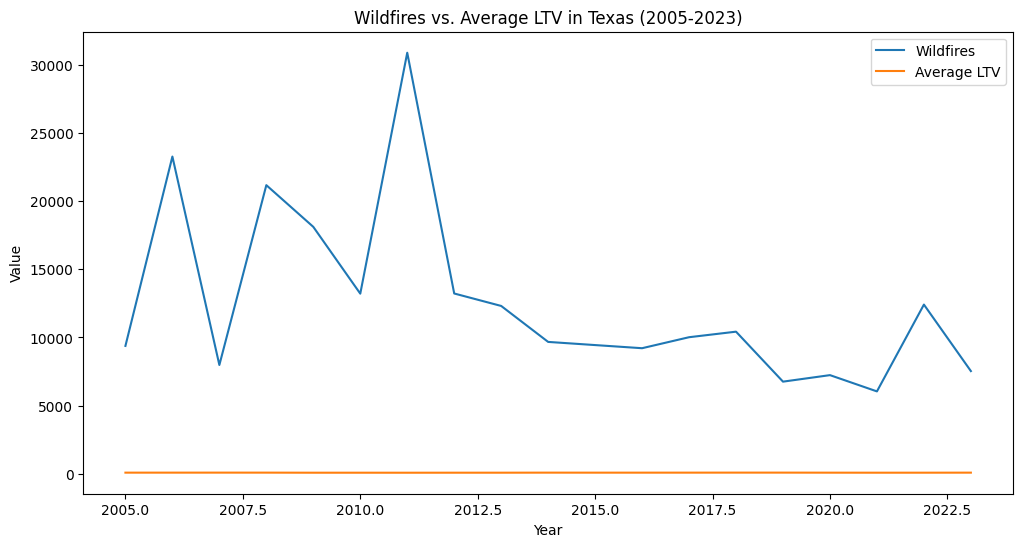

Correlation between Wildfires and Average LTV in Texas: 0.14825394882560736


In [33]:
# plot the correlation between the Wildfires and the average LTV in Texas from 2005 to 2023 by correlating the two dataframes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Wildfires', label='Wildfires')
sns.lineplot(data=avg_ltv, x='FIRST PAYMENT DATE', y='ORIGINAL LOAN-TO-VALUE (LTV)', label='Average LTV')
plt.title('Wildfires vs. Average LTV in Texas (2005-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate the correlation between the two variables
correlation = df['Wildfires'].corr(avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'])
print(f"Correlation between Wildfires and Average LTV in Texas: {correlation}")


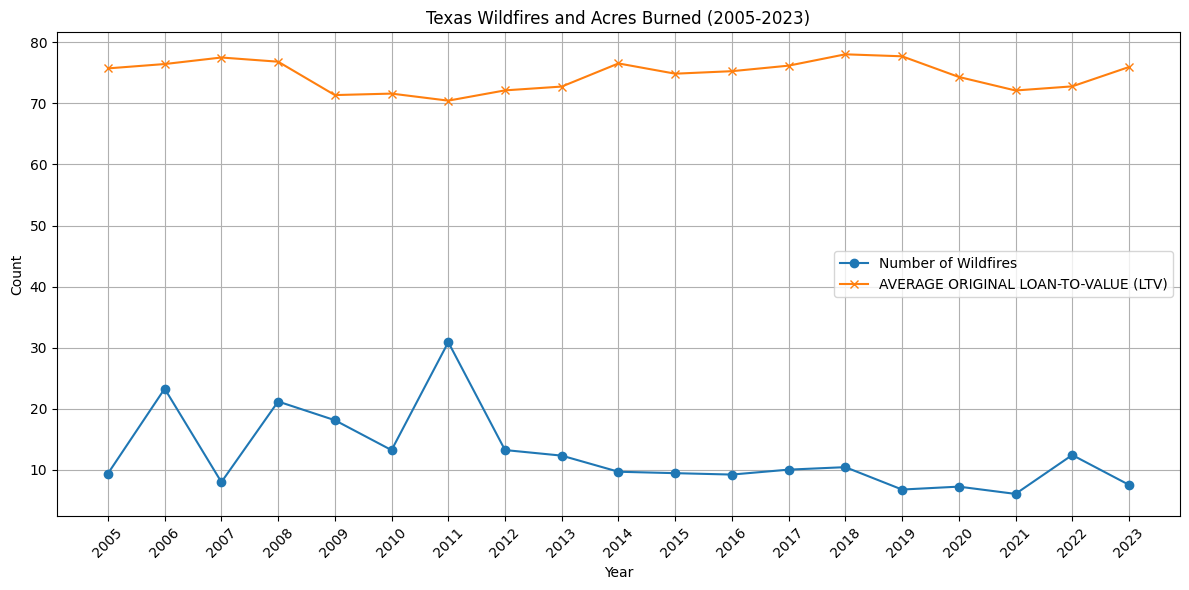

In [34]:
# Plotting the data

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Wildfires']/1000, marker='o', label='Number of Wildfires')
plt.plot(avg_ltv['FIRST PAYMENT DATE'], avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'], marker='x', label='AVERAGE ORIGINAL LOAN-TO-VALUE (LTV)')

plt.title('Texas Wildfires and Acres Burned (2005-2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'], rotation=45)  # Set the x-ticks to be the years
plt.tight_layout()
plt.show()



In [35]:
# Calculate the correlation between the two variables
correlation = df['Wildfires'].corr(avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'])
print(f"Correlation between Wildfires and Average LTV in Texas: {correlation}")

Correlation between Wildfires and Average LTV in Texas: 0.14825394882560736


In [36]:
# Shift the LTV values by 1 year to align with the Wildfires data
avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'] = avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'].shift(-1)
correlation = df['Wildfires'].corr(avg_ltv['ORIGINAL LOAN-TO-VALUE (LTV)'])
print(f"Correlation between Wildfires and Average LTV in Texas: {correlation}")

Correlation between Wildfires and Average LTV in Texas: 0.3273352816162212


In [6]:
# select the post code with 75200 and 75300
dallas_city = tx_df[(tx_df['POSTAL CODE'] == 75200) | (tx_df['POSTAL CODE'] == 75300)]
display(dallas_city.head())


,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA OR METROPOLITAN DIVISION,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),ORIGINAL DEBT-TO-INCOME RATIO,...,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,PROGRAM INDICATOR,RELIEF REFINANCE INDICATOR,PROPERTY VALUATION METHOD,INTEREST ONLY INDICATOR,MI CANCELLATION INDICATOR
29,765,1999-03-01,N,202902,19124.0,0,1,P,57,29,...,2,"NORWEST MORTGAGE, INC.","WELLS FARGO HOME MORTGAGE, INC.",NaN,NaN,9,NaN,9,N,9
86,688,1999-03-01,Y,202902,19124.0,18,1,P,97,25,...,2,Other sellers,NATIONAL CITY MORTGAGE CO.,NaN,NaN,9,NaN,9,N,9
129,765,1999-03-01,N,201402,NaN,0,1,P,31,19,...,2,"DIME SAVINGS BANK OF NEW YORK, FSB",Other servicers,NaN,NaN,9,NaN,9,N,9
156,751,1999-03-01,N,201402,NaN,0,1,P,63,11,...,2,"DIME SAVINGS BANK OF NEW YORK, FSB","JPMORGAN CHASE BANK, N.A.",NaN,NaN,9,NaN,9,N,9
193,757,1999-04-01,N,202903,19124.0,0,1,P,58,20,...,2,"DIME SAVINGS BANK OF NEW YORK, FSB",WASHINGTON MUTUAL BANK,NaN,NaN,9,NaN,9,N,9
